In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1494473518665029622, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14607904980171262916
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16208938561964430692
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7304613728
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 537454040432188918
 physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"]

In [ ]:
!cat /proc/meminfo
#the gpu info

MemTotal:       13333556 kB
MemFree:         9168132 kB
MemAvailable:   11844968 kB
Buffers:           75328 kB
Cached:          2739540 kB
SwapCached:            0 kB
Active:          1246452 kB
Inactive:        2502920 kB
Active(anon):     887912 kB
Inactive(anon):     8528 kB
Active(file):     358540 kB
Inactive(file):  2494392 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              2760 kB
Writeback:             0 kB
AnonPages:        934612 kB
Mapped:           687208 kB
Shmem:              9140 kB
Slab:             176724 kB
SReclaimable:     129592 kB
SUnreclaim:        47132 kB
KernelStack:        4320 kB
PageTables:         9148 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666776 kB
Committed_AS:    3431756 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              920 kB
AnonHugePages:   

In [ ]:
data_path = "/content/drive/My\ Drive/Colab\ Notebooks/Experiments/CASIA2/casia2_ela_zip.zip"

In [ ]:
!cp $data_path .

In [ ]:
!unzip casia2_ela_zip.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00045_arc00046_10084.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00045_arc00071_10087.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00046_arc00045_10083.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00054_cha00085_11922.jpg  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00071_arc00045_10085.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00073_arc00072_10267.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00088_arc00064_10394.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_art00012_art00013_11812.jpg  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_art00014_art00013_11836.jpg  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_art00058_art00049_10529.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_art00067_ani00093_11801.jpg  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_art00067_ani00095_11803.jpg  
  inflating: data/casia2_

In [ ]:
!pwd


/content


In [ ]:
!ls

casia2_ela_zip.zip  data  drive  sample_data


In [ ]:
data_path = "data/casia2_ela/"

In [ ]:
#nor_es
import os
import io
import numpy as np
from keras.preprocessing import image
import pandas as pd
from PIL import Image, ImageChops, ImageEnhance
import os
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model, Sequential 
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop, adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler
from keras.constraints import Constraint
from keras.constraints import UnitNorm




Using TensorFlow backend.


In [ ]:
def jpeg_compression(img: Image.Image, quality: int=90) -> Image.Image:
    if img.mode != 'RGB':
        img = img.convert('RGB')
    buffer = io.BytesIO()
    img.save(buffer, format='JPEG', quality=quality)
    im_data = buffer.getvalue()
    img = Image.open(io.BytesIO(im_data))
    buffer.close()
    return img


In [ ]:
def convert_to_ela(img):
    im = img.convert('RGB')
    resaved_im = jpeg_compression(im)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    
    return ela_im

In [ ]:
def scheduler(epoch):
  if epoch<5:
    return 0.001;
  else:
    return float(0.001*tf.math.exp(0.1*(10-epoch)))

lr_schedule = LearningRateScheduler(scheduler)

In [ ]:
#Defining Parameters
batch_size = 32
nb_epochs = 25
img_width = 256
img_height = 256


In [ ]:
model = Sequential()

# input dimensions 

model.add(Conv2D(filters=16, kernel_size = (5,5), padding = 'valid',activation ='relu', 
                 kernel_constraint= UnitNorm(axis = [0, 1, 2]), input_shape=(img_height, img_width, 3)))


print("Input: ", model.input_shape)
print("Output: ", model.output_shape)


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid',activation ='relu' ))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', activation ='relu'))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(MaxPooling2D(pool_size=(2,2)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Dropout(0.25))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape, "  <----------")








#def tf_spatial_pyramid_pooling(tf_input_feature_maps, tf_spatial_pyramid, dtype=tf.float32):
#    return tf.py_func(np_spatial_pyramid_pooling, [tf_input_feature_maps, tf_spatial_pyramid], dtype)
#average pooling !!

#from keras.layers import Input
#from keras.models import Model
#from keras_pyramid_pooling_module import PyramidPoolingModule

#input_ = Input((224, 224, 3))
#x = PyramidPoolingModule()(input_)
#model = Model(inputs=input_, outputs=x)

#model.add(GlobalAveragePooling2D())
#print("Input: ", model.input_shape)
#print("Output: ", model.output_shape, " <-----------")







model.add(Flatten())
print("Input: ", model.input_shape)
print("Output: ", model.output_shape, "final2")

model.add(Dense(256, activation = "relu"))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)
    

model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape, "final2")



Input:  (None, 256, 256, 3)
Output:  (None, 252, 252, 16)
Input:  (None, 256, 256, 3)
Output:  (None, 248, 248, 32)
Input:  (None, 256, 256, 3)
Output:  (None, 244, 244, 32)
Input:  (None, 256, 256, 3)
Output:  (None, 122, 122, 32)
Input:  (None, 256, 256, 3)
Output:  (None, 122, 122, 32)   <----------
Input:  (None, 256, 256, 3)
Output:  (None, 476288) final2
Input:  (None, 256, 256, 3)
Output:  (None, 256)
Input:  (None, 256, 256, 3)
Output:  (None, 2) final2


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 252, 252, 16)      1216      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 248, 248, 32)      12832     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 244, 244, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 122, 122, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 122, 122, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 476288)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [ ]:
#optimizer = RMSprop(lr=0.0005, rho=0.9, epsilon=1e-08, decay=0.0)


In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

In [ ]:
#weights = "saved_weights/test1.hdf5"
#model.load_weights(weights)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,  validation_split=0.2)

In [ ]:
!pwd

/content


In [ ]:
!ls

casia2_ela_zip.zip  data  drive  sample_data


In [ ]:
train_data = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 10092 images belonging to 2 classes.


In [ ]:
validation_data = train_datagen.flow_from_directory(
    data_path, # same directory as training data
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 2522 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
            train_data,
            steps_per_epoch = train_data.samples // batch_size,
            validation_data = validation_data, 
            validation_steps = validation_data.samples // batch_size,
            epochs = nb_epochs,
            callbacks = [lr_schedule])

Epoch 1/25
315/315 [==============================] - 125s 396ms/step - loss: 0.6027 - accuracy: 0.6277 - val_loss: 0.6414 - val_accuracy: 0.5120
Epoch 2/25
315/315 [==============================] - 117s 372ms/step - loss: 0.3520 - accuracy: 0.8469 - val_loss: 0.6047 - val_accuracy: 0.8562
Epoch 3/25
315/315 [==============================] - 117s 372ms/step - loss: 0.2380 - accuracy: 0.9080 - val_loss: 0.2338 - val_accuracy: 0.8490
Epoch 4/25
315/315 [==============================] - 117s 373ms/step - loss: 0.1612 - accuracy: 0.9402 - val_loss: 0.3336 - val_accuracy: 0.8594
Epoch 5/25
315/315 [==============================] - 117s 373ms/step - loss: 0.0967 - accuracy: 0.9664 - val_loss: 0.3016 - val_accuracy: 0.7839
Epoch 6/25
315/315 [==============================] - 117s 372ms/step - loss: 0.1241 - accuracy: 0.9540 - val_loss: 0.2856 - val_accuracy: 0.8406
Epoch 7/25
315/315 [==============================] - 117s 371ms/step - loss: 0.0712 - accuracy: 0.9781 - val_loss: 0.9969 -

In [ ]:
print("done")

done


In [ ]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])


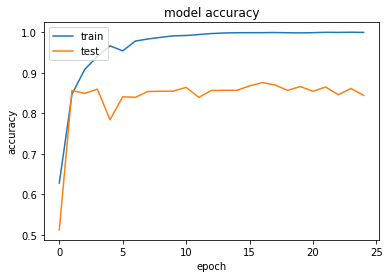

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



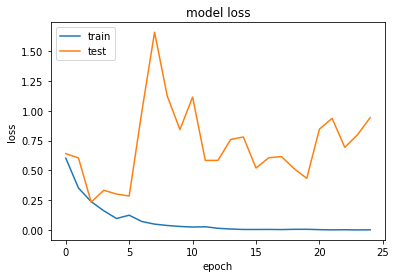

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(validation_data, validation_data.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_data.classes, y_pred))


print('Classification Report')
target_names = ['Aut', 'Tamp']
print(classification_report(validation_data.classes, y_pred, target_names=target_names))

Confusion Matrix
[[774 724]
 [521 503]]
Classification Report
              precision    recall  f1-score   support

         Aut       0.60      0.52      0.55      1498
        Tamp       0.41      0.49      0.45      1024

    accuracy                           0.51      2522
   macro avg       0.50      0.50      0.50      2522
weighted avg       0.52      0.51      0.51      2522



In [ ]:
x, y = validation_data.class_indices
print(x, y)

aut tamp


In [ ]:
print("done")

done


In [ ]:
#!cp -r path/to/google_drive_data_dir/ path/to/colab_data_dir

In [ ]:
#path of any test image
predict_path = "predict_images/i1_cm1.jpg"



In [ ]:
from IPython.display import Image as imgloader
display(imgloader(filename = predict_path, width = img_width, height=img_height))


In [ ]:
test_img = image.load_img(predict_path, target_size = (img_width, img_height))


test_img = convert_to_ela(test_img)



temp = test_img
test_image = image.img_to_array(test_img)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
temp


In [ ]:
train_data.class_indices

In [ ]:
result

In [ ]:
tamp = result[0][1]
if(tamp==1):
    print("Fake image, some tampering detected !")
else:
    print("The image looks authentic !")